<a href="https://colab.research.google.com/github/Pushpendra-09/Simple_Linear_Regression/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression from scratch

In this example we will consider sales based on 'TV' marketing budget.

In this notebook, we'll build a linear regression model to predict 'Sales' using 'TV' as the predictor variable.


In [1]:
import pandas as pd

In [5]:
#load the dataset
advertising = pd.read_csv('adv.csv')

Now, let's check the structure of the advertising dataset.

In [6]:
# Display the first 5 rows
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [ ]:
# Display the last 5 rows
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [ ]:
# Let's check the columns
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [ ]:
# Check the shape of the DataFrame (rows, columns)
advertising.shape

(200, 2)

In [ ]:
# Let's look at some statistical information about the dataframe.
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


# Visualising Data Using Plot

<Axes: xlabel='TV', ylabel='Sales'>

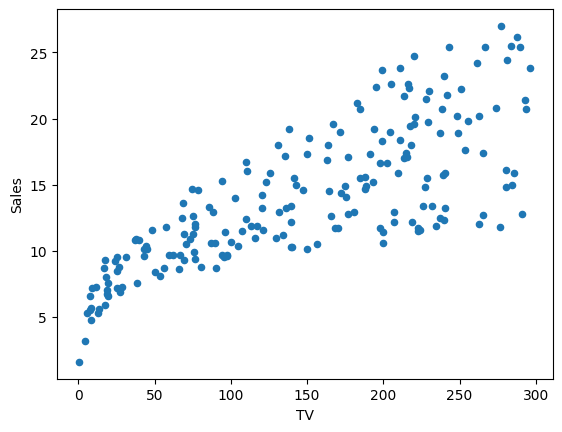

In [ ]:
# Visualise the relationship between the features and the response using scatterplots
advertising.plot(x='TV',y='Sales',kind='scatter')

# Perfroming Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

## Preparing X and y

-  The scikit-learn library expects X (feature variable) and y (response variable) to be NumPy arrays.


In [7]:
# Putting feature variable to X
x = advertising.iloc[:,0].values
y= advertising.iloc[:,1].values

# Print the x
x


array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 199.8, 100.4, 216.4, 182.6,
       262.7, 198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3,
       102.7, 131.1,  69. ,  31.5, 139.3, 237.4, 216.8, 199.1, 109.8,
        26.8, 129.4, 213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4,
       239.8,  75.3,  68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 109.8,
       134.3,  28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7,
       135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9,  25. ,  90.4,
        13.1, 255.4, 225.8, 241.7, 175.7, 209.6,  78.2,  75.1, 139.2,
        76.4, 125.7,  19.4, 141.3,  18.8, 224. , 123.1, 229.5,  87.2,
         7.8,  80.2,

In [ ]:
y


array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16

## Splitting Data into Training and Testing Sets

In [8]:
#random_state is the seed used by the random number generator, it can be any integer.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7 , random_state=0000)

In [9]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140,)
(140,)
(60,)
(60,)


## Performing Linear Regression

In [11]:
class simpleLR:
  def __init__ (self):
    self.m=None
    self.b=None
  def fit(self,X_train,y_train):
    for i in range(X_train.shape[0]):
      num=0
      den=0
      num=num+(X_train[i]-X_train.mean())*(y_train[i]-(y_train.mean()))
      den=den+(X_train[i]-X_train.mean())*(X_train[i]-X_train.mean())
    self.m=num/den
    self.b=(y_train.mean())-(self.m*(X_train.mean()))
    print(self.m)
    print(self.b)
  def predict(self,X_test):
    return self.m * X_test+self.b




In [12]:
#print the cofficient and intercept
lr=simpleLR()
lr.fit(X_train,y_train)

0.05035163091796699
6.613108034007847


In [13]:
X_test


array([ 69.2,  50. ,  90.4, 289.7, 170.2,  56.2,   8.7, 240.1,  23.8,
       197.6, 261.3,  87.2, 156.6, 187.8,  76.4, 120.2, 265.6,   0.7,
        74.7, 213.4, 287.6, 140.3, 175.1, 131.7,  53.5, 123.1, 165.6,
       205. , 224. ,  25.1,  67.8, 198.9, 280.7, 241.7,  13.2,  18.7,
        59.6, 180.8,  68.4,  25. ,  36.9,  31.5, 142.9, 209.6, 215.4,
       102.7,   8.6,  16.9, 125.7, 104.6, 109.8, 229.5, 253.8, 184.9,
        44.7,  62.3, 292.9, 172.5, 202.5,   7.3])

$y=6.6131+0.05035× X_test$  ($y = b + m * x$) <br>
Now, let's use this equation to predict our sales.


In [14]:
#making prediction
lr.predict(X_test[0])

10.097440893531163

In [15]:
y_pred=lr.predict(X_test)

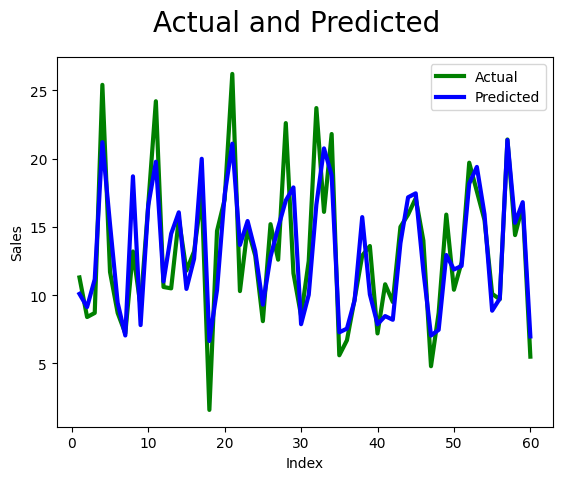

In [17]:
# Actual vs Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)]         # generating index
fig = plt.figure()
plt.plot(c,y_test, color="green", linewidth=3, linestyle="-")
plt.plot(c,y_pred, color="blue",  linewidth=3, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend(['Actual','Predicted'])


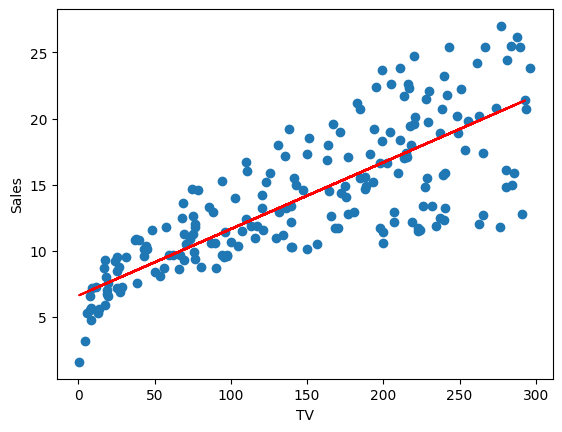

In [18]:
# decision boundary
plt.scatter(advertising['TV'],advertising['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.plot(X_test,y_pred,color='red')